Excersise 3 Question 2 and Question 2.5

In [9]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

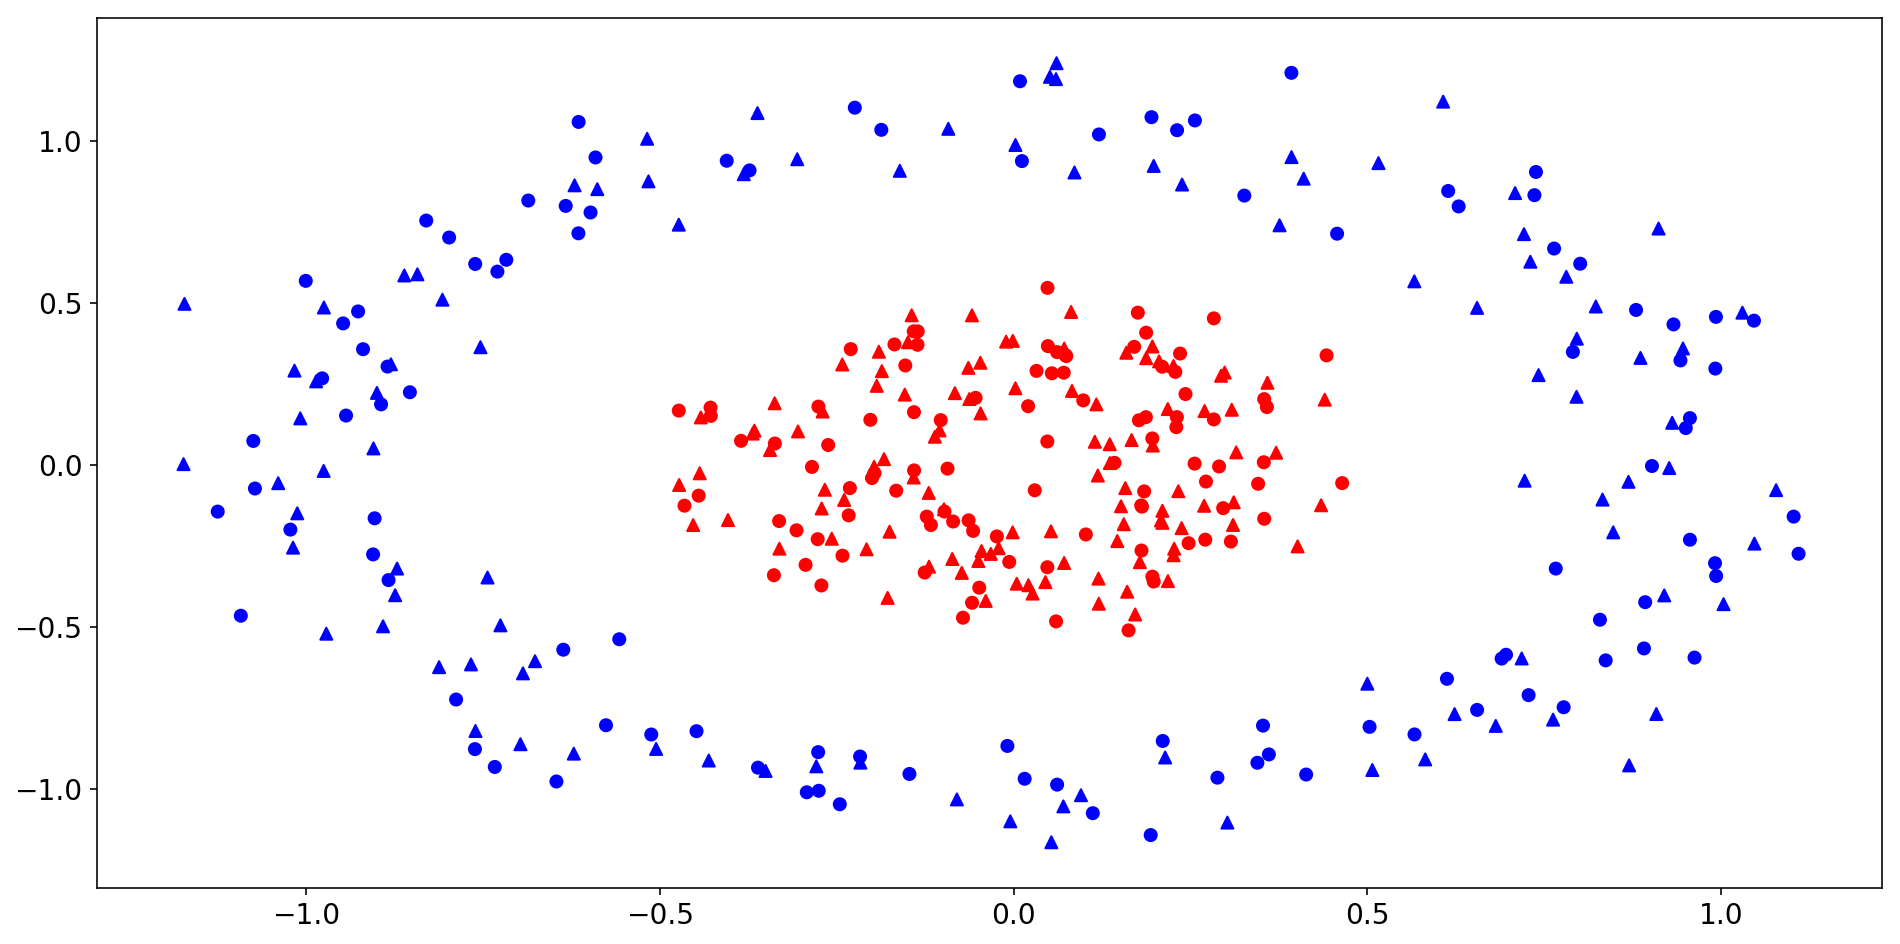

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y > 0.5))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^')


In [11]:
from sklearn.neural_network import MLPClassifier

LoR = MLPClassifier(max_iter=10000, hidden_layer_sizes=(70))
LoR.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=70, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

3


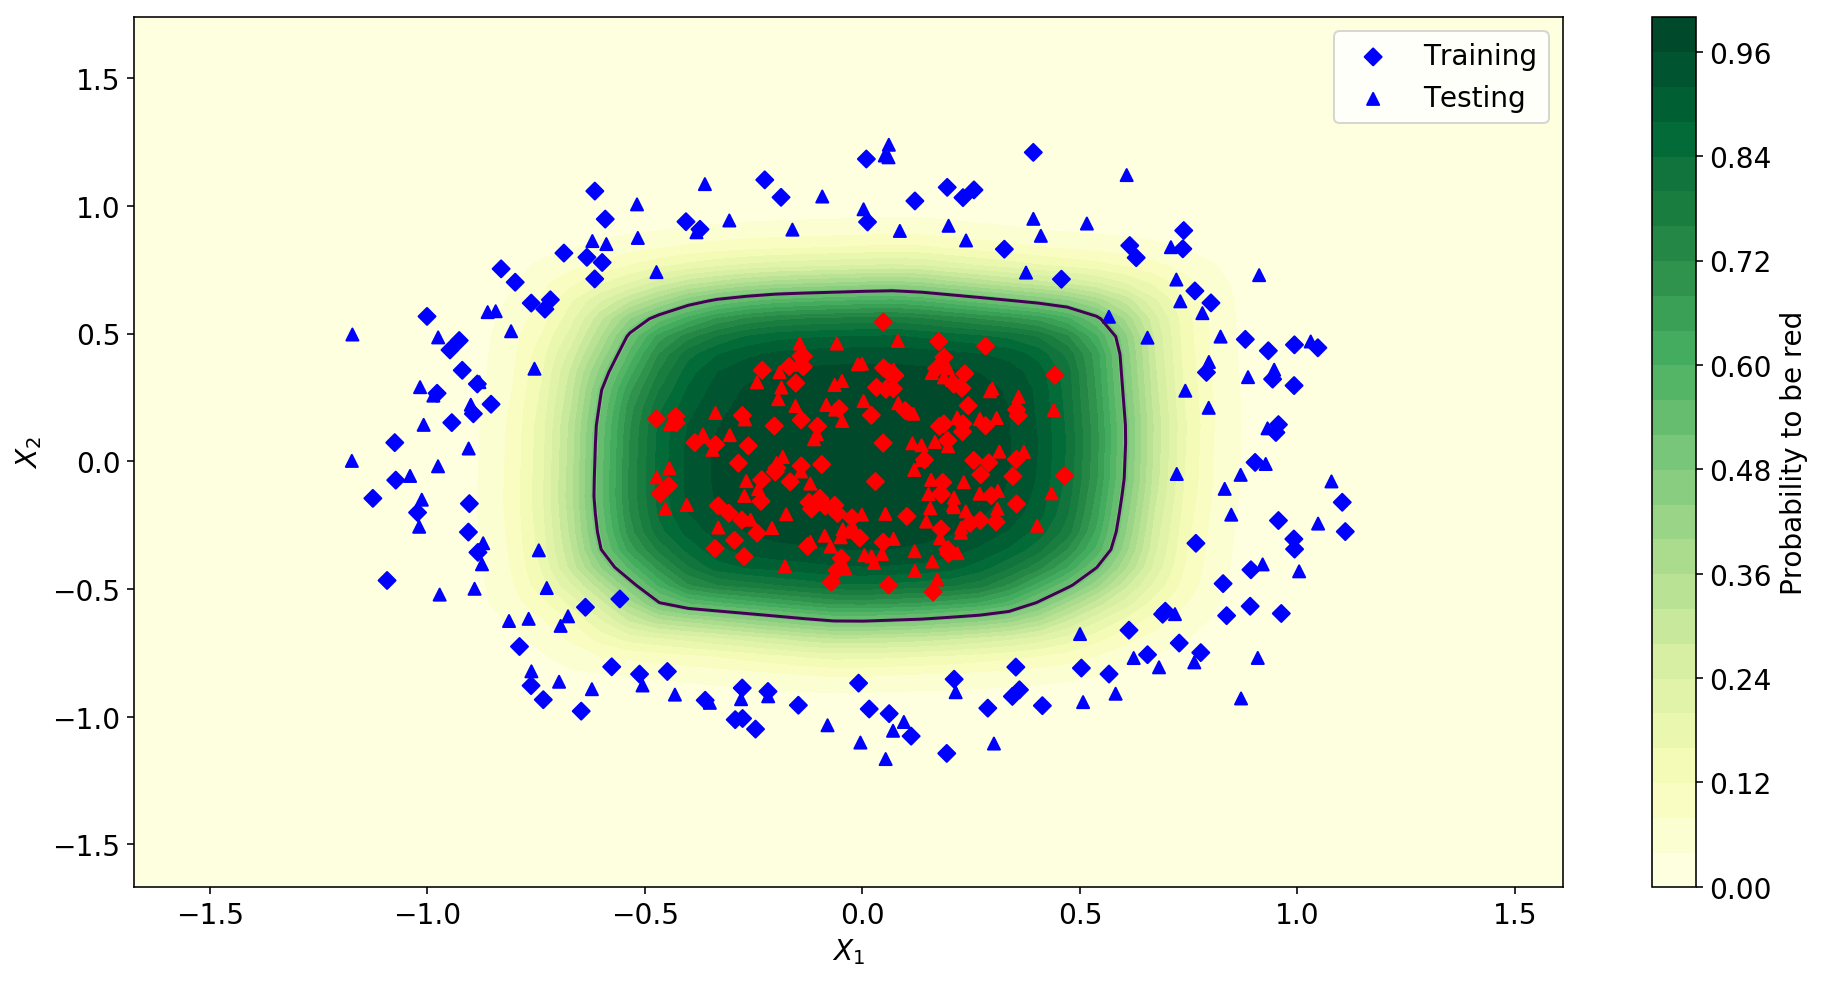

In [12]:
from matplotlib.colors import ListedColormap
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))


Z = LoR.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

mpt=plt.contourf(xx, yy, Z , 25, cmap="YlGn", vmin=0, vmax=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='D', label='Training')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^', label ='Testing')
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$");
plt.colorbar(mpt, label="Probability to be red")
plt.legend(loc='best')
plt.contour(xx, yy, Z, levels=[.5])


print(LoR.n_layers_)

There are three layers used. Minimal width of layers was tested. For this testing the number of iterations needed to be set to 10000. The performence did not change significantly with decresing the with until with equal to 15 was reached. For width equal to 10 to 15, the performance is worse in comparison with higher widths as more blue points are contained in red region. Surprisingly, for width between 4 and 9 the performance is better again (equally good as in case of numbers higher than 15) in case of same tested seed. Depending on the random seed, the lowest succesfull width is between 5 to 7, bellow this number the classification fails completelly.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2,interaction_only=False)
MLPC = MLPClassifier(max_iter=10000, hidden_layer_sizes=(100))
pipeline = Pipeline([("polynomial_features", poly), ("MLPC", MLPC)])


3


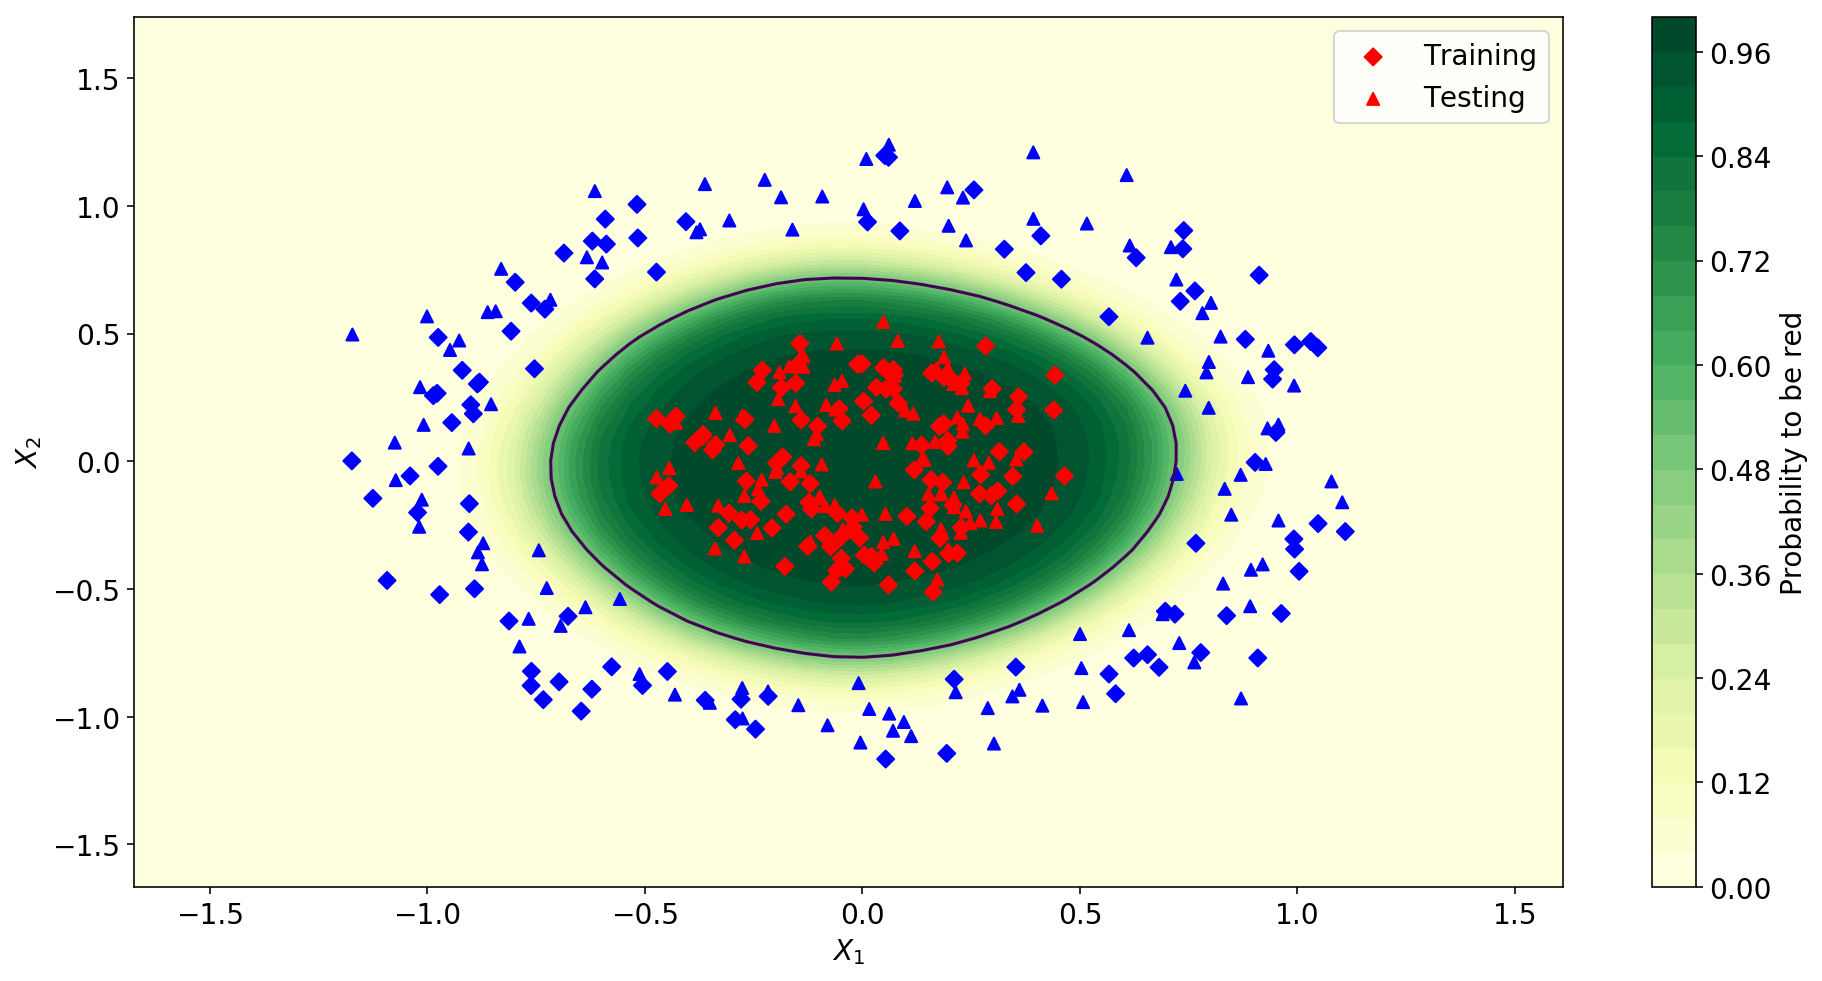

In [16]:
X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
pipeline.fit(X_train,y_train)


Z = pipeline.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

mpt=plt.contourf(xx, yy, Z , 25, cmap="YlGn", vmin=0, vmax=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='D', label='Training')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^', label ='Testing')
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$");
plt.colorbar(mpt, label="Probability to be red")
plt.legend(loc='best')
plt.contour(xx, yy, Z, levels=[.5])


print(LoR.n_layers_)

After addition of polynomial features, the number of layers remains equal to 3 and the minimal with required is reduced to 1.

Adding definitions needed to see the transformation

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000,
                    solver='sgd', verbose=0, random_state=1,
                    learning_rate_init=0.02, activation='tanh')

In [18]:
def compute_activations(mlp):
    # fit it first to populate the various attributes ...
    mlp.fit(X_train, y_train)

    # re-implement the forward pass logic from within the MLP class
    # so we can access the intermediate activations
    hidden_layer_sizes = mlp.hidden_layer_sizes
    hidden_layer_sizes = list(hidden_layer_sizes)
    layer_units = [X_test.shape[1]] + hidden_layer_sizes + [mlp.n_outputs_]

    activations = [X_test]
    for i in range(mlp.n_layers_ - 1):
        activations.append(np.empty((X.shape[0],
                                     layer_units[i + 1])))
    # forward pass
    mlp._forward_pass(activations)
    return activations

In [19]:
def plot_activations(activations):
    np.random.seed(123)
    hidden_layer = activations[-2]
    y_pred = activations[-1]

    fig, ax = plt.subplots(1, 3, figsize=(12,4))

    # input
    ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train, lw=0.)
    ax[0].set_xlabel("Input feature")
    ax[0].set_ylabel('Dummy')
    ax[0].set_ylim([-3,3]);

    # hidden layer
    ax[1].scatter(hidden_layer[:,0], hidden_layer[:,1], c=y_test, lw=0)
    ax[1].set_xlabel('neuron 1')
    ax[1].set_ylabel('neuron 2')
    #ax[1].set_xlim([-1, 1])
    #ax[1].set_ylim([-1, 1])

    # output layer
    ax[2].scatter(activations[-1],  X_train[:,1], c=y_test, lw=0)
    ax[2].set_xlabel('network output')
    ax[2].set_ylabel('dummy')
    ax[2].set_xlim([0,1])
    ax[2].set_ylim([-3,3]);

    plt.tight_layout();
    plt.show()

In [20]:
def run(iteration=1, activation='tanh'):
    mlp.set_params(max_iter=iteration, activation=activation)

    activations4 = compute_activations(mlp)
    plot_activations(activations4)


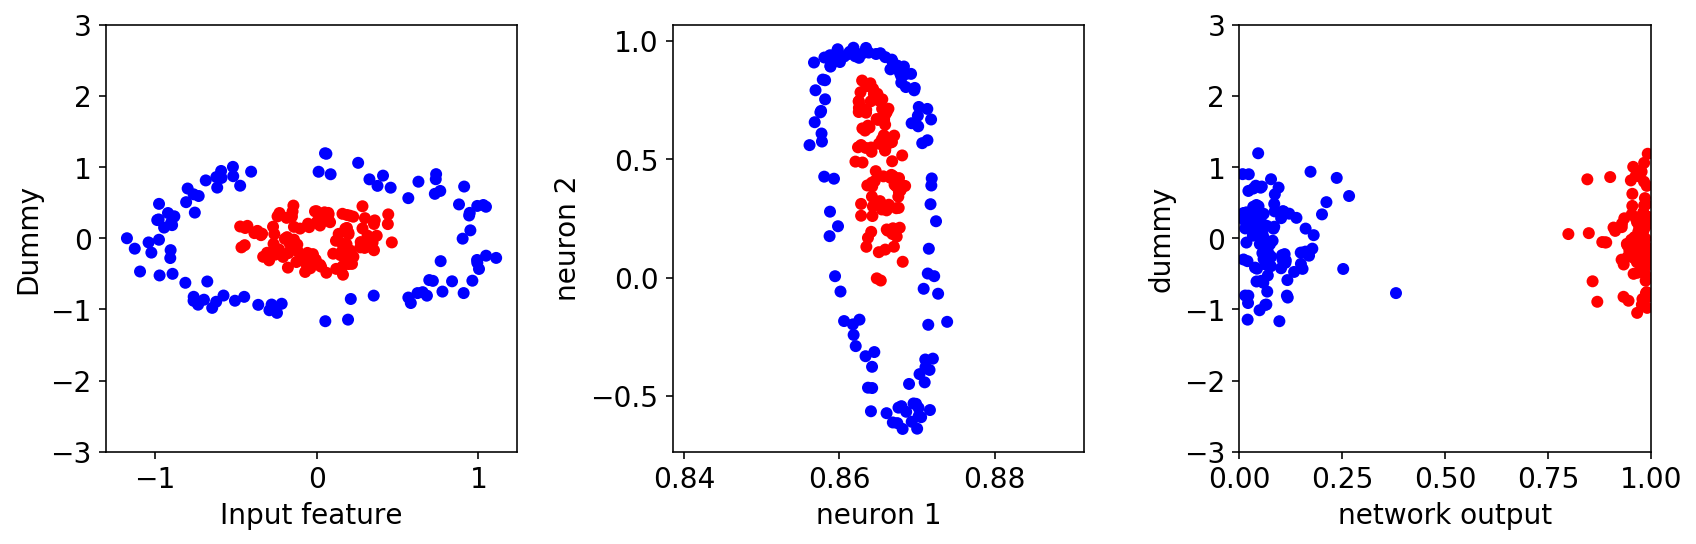

In [21]:
    
from ipywidgets import interact    
interact(run, iteration=(1000, 1500, 10), activation=['tanh', 'identity', 'relu']);

Using network output the problem becomes lineary separable in network output variable shown in the 3rd plot.

Activation with retu seem to lead to a better separation than activation with tanh

In [22]:
def make_spiral():
    N = 100 # number of points per class
    K = 3 # number of classes
    X = np.zeros((N*K, 2)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N) # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j

    return X, y

In [23]:
X, y = make_spiral()
labels = ['b', 'r']
y = np.take(labels, (y > 0.5))

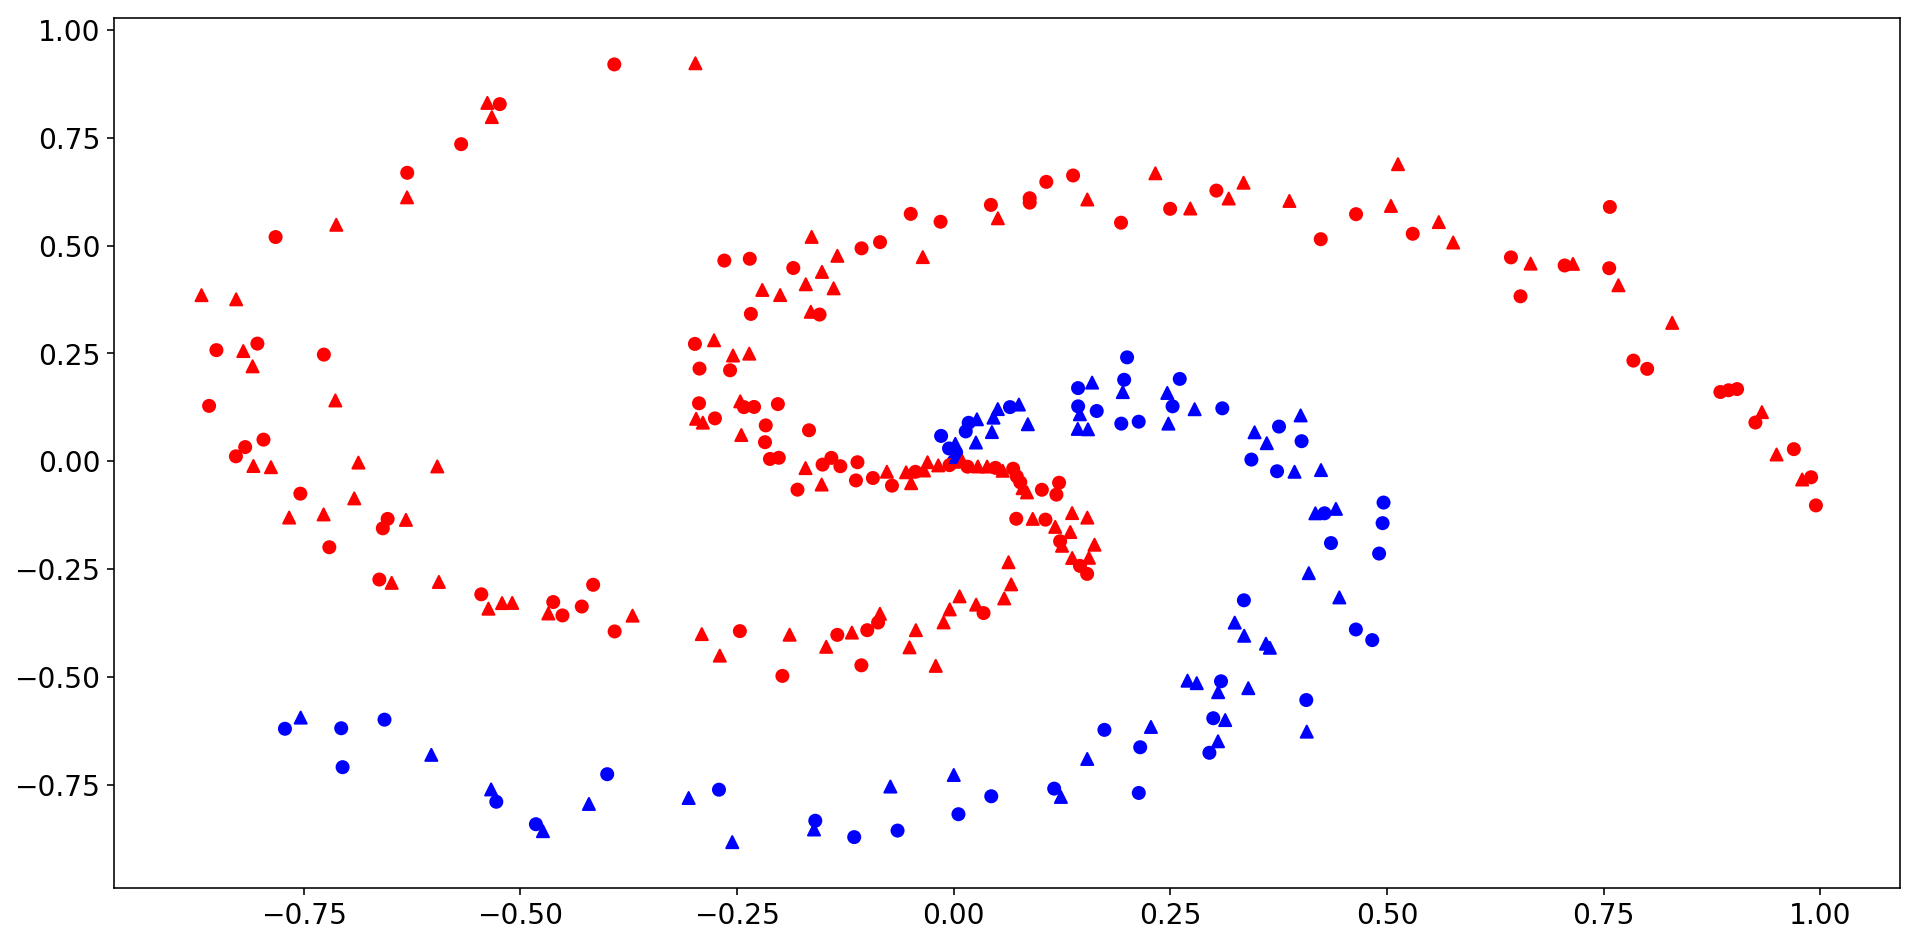

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^')

In [33]:
LoRs = MLPClassifier(max_iter=10000, hidden_layer_sizes=(100))
LoRs.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

3


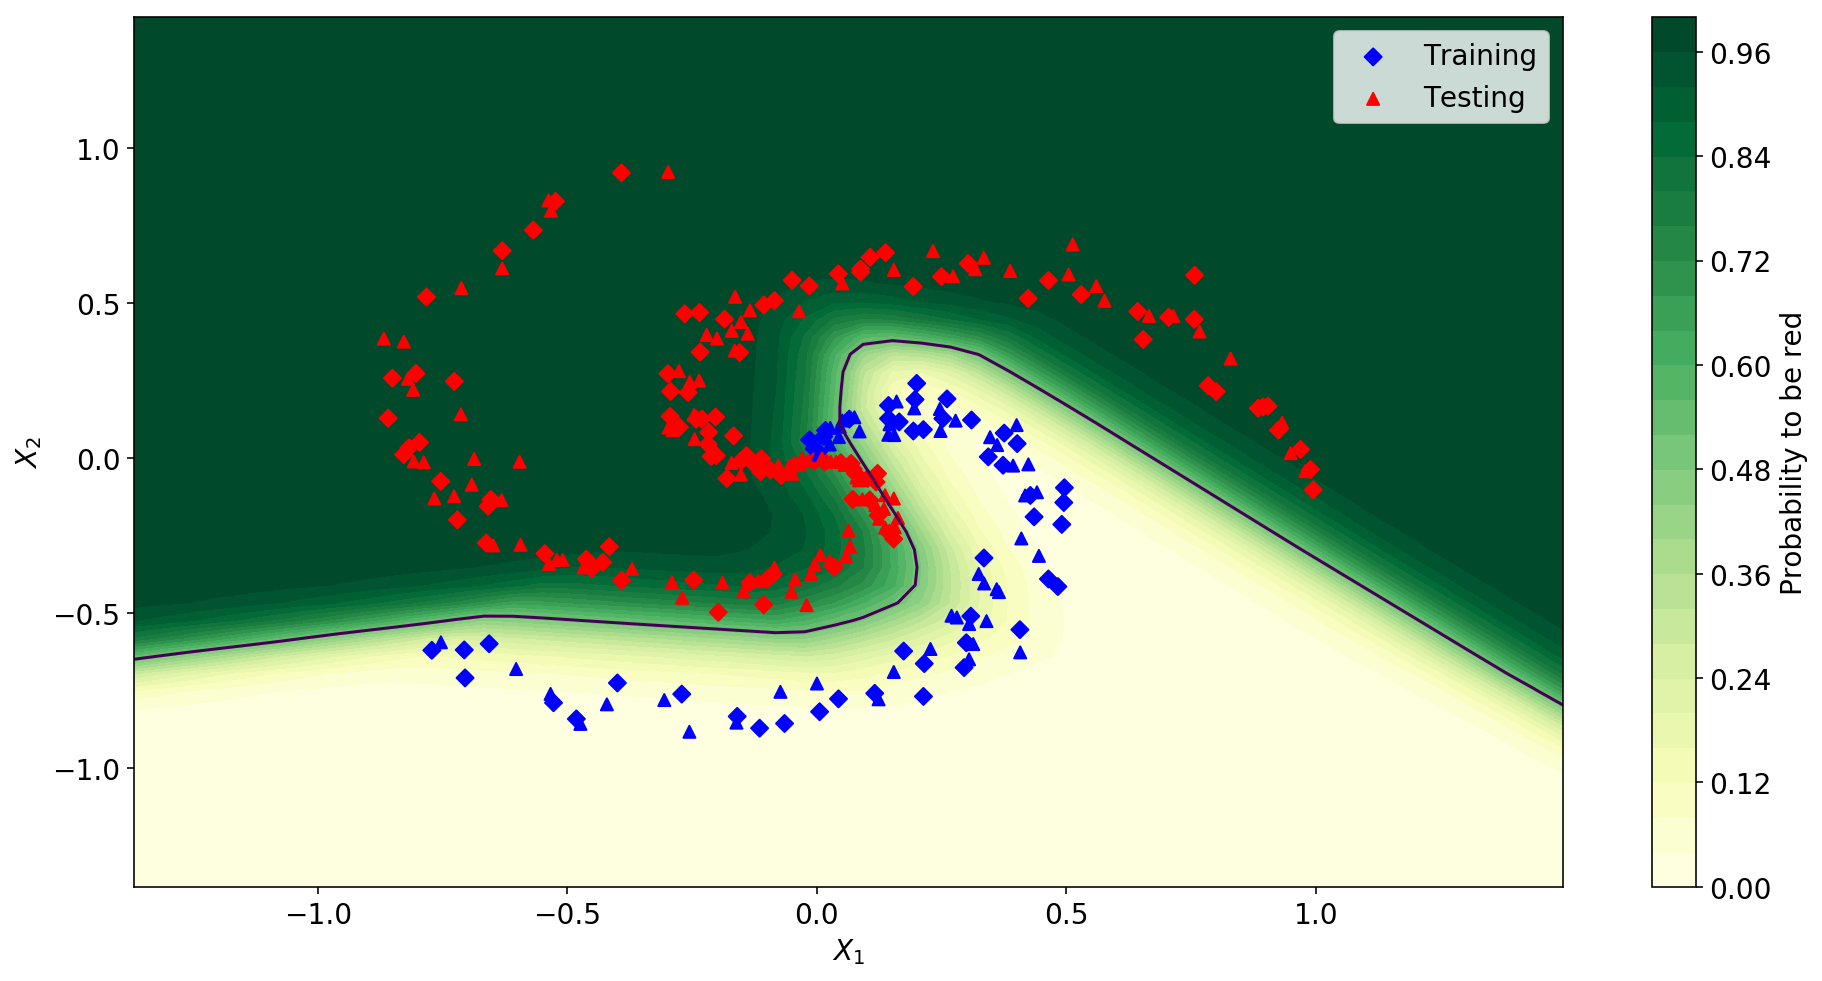

In [34]:
from matplotlib.colors import ListedColormap
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))


Z = LoRs.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

mpt=plt.contourf(xx, yy, Z , 25, cmap="YlGn", vmin=0, vmax=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='D', label='Training')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='^', label ='Testing')
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$");
plt.colorbar(mpt, label="Probability to be red")
plt.legend(loc='best')
plt.contour(xx, yy, Z, levels=[.5])


print(LoRs.n_layers_)

with decresing hidden_layer_sizes performance is worsening, for example for 500 the bourder is sharp and only 3 points are misclassified. On the other hand, for 100 already 12 points are misclassified and for 50 it is more than 25 and for 10 the fit is not reasonable any longer as it does not reflect the shape of the data anymore. Number of layers is again equal to 3. The described results apply for ReLu activation, for tanh, the fit is not reasonable regardless sizes of hidden layers.